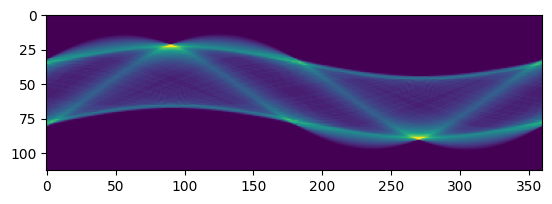

In [6]:
import numpy as np
import matplotlib.pyplot as plt

file_path1 = "dataset/sino/0016_sino.npy"

sinogram = np.load(file_path1)

plt.imshow(sinogram[:, :, 64])
plt.show()



C:\Users\enf31\AppData\Local\Temp\ipykernel_18832\1693994580.py:23: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  s_slice = torch.from_numpy(sino[:, :, d]).unsqueeze(0).to(device)


Shape: (113, 113, 128)
Dtype: float32
Min: 0.0 Max: 1.0
Sample slice [0]:
 [[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.12670031 0.13828927 0.140285   ... 0.11264468 0.11264468 0.11264468]
  [0.0383691  0.03497611 0.03681685 ... 0.02375949 0.02375949 0.02375949]]

 [[0.06185374 0.04357202 0.06066895 ... 0.08690681 0.08690681 0.08690681]
  [0.00247121 0.         0.01057014 ... 0.03077733 0.03077733 0.03077733]
  [0.018705   0.03561249 0.07588663 ... 0.06724966 0.06724966 0.06724966]
  ...
  [0.04208558 0.06492788 0.06173117 ... 0.03534843 0.03534843 0.03534843]
  [0.19820635 0.20577769 0.19428621 ... 0.18737844 0.18737844 0.18737844]
  [0.12856716 0.07507725 0.07017586 ... 0.1408596  0.1408596  0.1408596 ]]

 [[0.10981283 0.14417

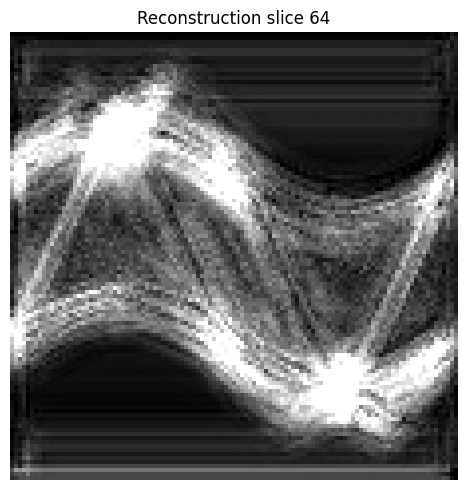

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils.yaml_config import load_config
from models.hdn import HDNSystem
from data.dataset import _load_sino_uaD

cfg = load_config("config.yaml")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HDNSystem(cfg).to(device)
ckpt = torch.load("results/best_shared.pt", map_location=device)
model.load_state_dict(ckpt["model_state"])
model.eval()

sino = _load_sino_uaD("dataset/sino/0016_sino.npy")
U, A, D = sino.shape
X = Y = U

pred_vol = np.zeros((X, Y, D), dtype=np.float32)
with torch.no_grad():
    for d in range(D):
        s_slice = torch.from_numpy(sino[:, :, d]).unsqueeze(0).to(device)
        r_hat = model(s_slice, v_slice=None, train_mode=False)
        pred_vol[:, :, d] = r_hat[0, 0].cpu().numpy()
        
arr = pred_vol

print("Shape:", arr.shape)
print("Dtype:", arr.dtype)
print("Min:", arr.min(), "Max:", arr.max())
print("Sample slice [0]:\n", arr)
np.save("predicted_volume", pred_vol)


mid = D // 2
plt.figure(figsize=(5,5))
plt.title(f"Reconstruction slice {mid}")
plt.imshow(pred_vol[:, :, mid], cmap="gray", vmin=0.0, vmax=1.0)
plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:
sinogram.shape, arr.shape

((113, 360, 128), (113, 113, 128))

In [7]:
slice_num = 10

In [ ]:
slice_num = 10
sinogram_opt = model(torch.from_numpy(sinogram[:, :, slice_num]).unsqueeze(0).to(device), v_slice=None, train_mode=False)
plt.imshow(sinogram[:, :, slice_num])
plt.show()